# Fuel Analysis

#### This is part three of project FuelPrices.

* Part one of the programm scraped http://www.fuelprices.gr/deltia_dn.view and downloaded all pdf files.

* Part two of the programm scraped the downloaded pdf files and created a concatenated file with all the information.

#### In this part the obtained informations are used to gain useful insights for the prices of the different types of fuel in each prefecture of Greece.
*Last Update: 17/5/2022*

---
### Importing nessecery libraries and reading data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime as dt
from numpy import mean
from tqdm.auto import tqdm

In [2]:
dir=os.getcwd()
os.chdir(dir+'\Fuel')

all_data=pd.read_csv('nomos.csv')
all_data['date']=pd.to_datetime(all_data['date'], format="%Y/%m/%d")
all_data.set_index(['date', 'nomos'], inplace=True)

---
### Data Preview and cleaning

In [15]:
all_data.head()

Unleaded 95  Unleaded 100  Super  Diesel  Autogas
date       nomos                                                          
2017-03-14 N. ACHAIAS          1.526         1.742  1.733   1.295    1.008
           N. ARGOLIDAS        1.533         1.698  1.510   1.275    0.997
           N. ARKADIAS         1.569         1.742  1.855   1.310    0.990
           N. ARTAS            1.533         1.713    NaN   1.288    1.010
           N. ATTIKIS          1.503         1.713  1.632   1.264    0.967

In [16]:
all_data.isnull().sum()

Unleaded 95         0
Unleaded 100        4
Super           74677
Diesel              2
Autogas          1460
dtype: int64

**Super** will be used only for the **average price of all prefectures** because of the number of missing values it contains.

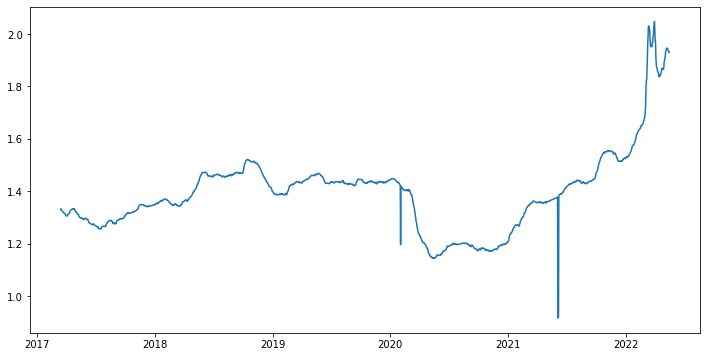

In [17]:
plt.figure(figsize=(12,6))
plt.plot(all_data.xs('N. CHANION', level='nomos')['Diesel'])
plt.show()

In some prefectures, some instances must be deleted:
* Very sudden fall of the price is observed.
* There is no socio-economical reason for these to exist.
* With further inspection they are created because of the combination of human error and false read of the pdf reader.   

In [3]:
nomoi=['N. ATTIKIS','N. ETOLOAKARNANIAS','N. ARGOLIDAS','N. ARKADIAS','N. ARTAS','N. ACHAIAS','N. VIOTIAS','N. GREVENON','N. DRAMAS',
        'N. DODEKANISON','N. EVROU','N. EVVIAS','N. EVRYTANIAS','N. ZAKYNTHOU','N. ILIAS','N. IMATHIAS','N. IRAKLIOU','N. THESPROTIAS','N. THESSALONIKIS',
        'N. IOANNINON','N. KAVALAS','N. KARDITSAS','N. KASTORIAS','N. KERKYRAS','N. KEFALLONIAS','N. KILKIS','N. KOZANIS','N. KORINTHOU','N. KYKLADON',
        'N. LAKONIAS','N. LARISAS','N. LASITHIOU','N. LESVOU','N. LEFKADAS','N. MAGNISIAS','N. MESSINIAS','N. XANTHIS','N. PELLAS','N. PIERIAS','N. PREVEZAS',
        'N. RETHYMNOU','N. RODOPIS','N. SAMOU','N. SERRON','N. TRIKALON','N. FTHIOTIDAS','N. FLORINAS','N. FOKIDAS','N. CHALKIDIKIS','N. CHANION','N. CHIOU','all']

In [4]:
delete=[]
for j in tqdm(range(len(nomoi))): 
    for i in range(len(all_data.xs(nomoi[j], level='nomos')['Diesel'])-1):
        
        if all_data.xs(nomoi[j], level='nomos')['Diesel'][i+1]<=0.85*all_data.xs(nomoi[j], level='nomos')['Diesel'][i]:

            temp1=all_data.xs(nomoi[j], level='nomos')['Diesel'].index[i+1]
            temp2=all_data.xs(nomoi[j], level='nomos')['Diesel'].index[i+2]
            temp3=all_data.xs(nomoi[j], level='nomos')['Diesel'].index[i+3]

            if temp1 not in delete:
                delete.append(temp1)
            if temp2 not in delete:
                delete.append(temp2)
            if temp3 not in delete:
                delete.append(temp3)

for i in range(len(delete)):
    all_data.drop(delete[i],axis=0, level='date',inplace=True)

all_data.to_csv('nomos_cleaned.csv')


100%|██████████| 52/52 [08:50<00:00, 10.20s/it]


After cleaning:

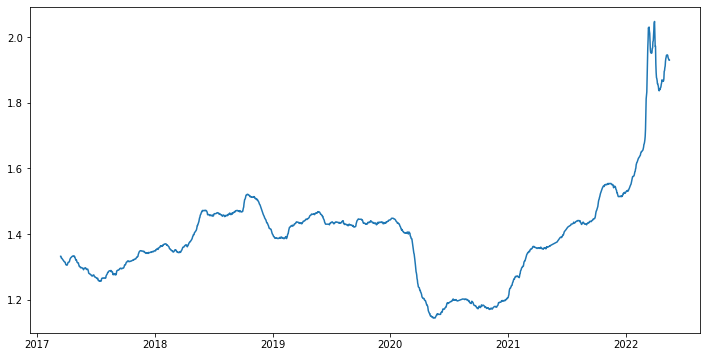

In [7]:
plt.figure(figsize=(12,6))
plt.plot(all_data.xs('N. CHANION', level='nomos')['Diesel'])
plt.show()

---
### Average price of all prefectures in Greece throughout the years

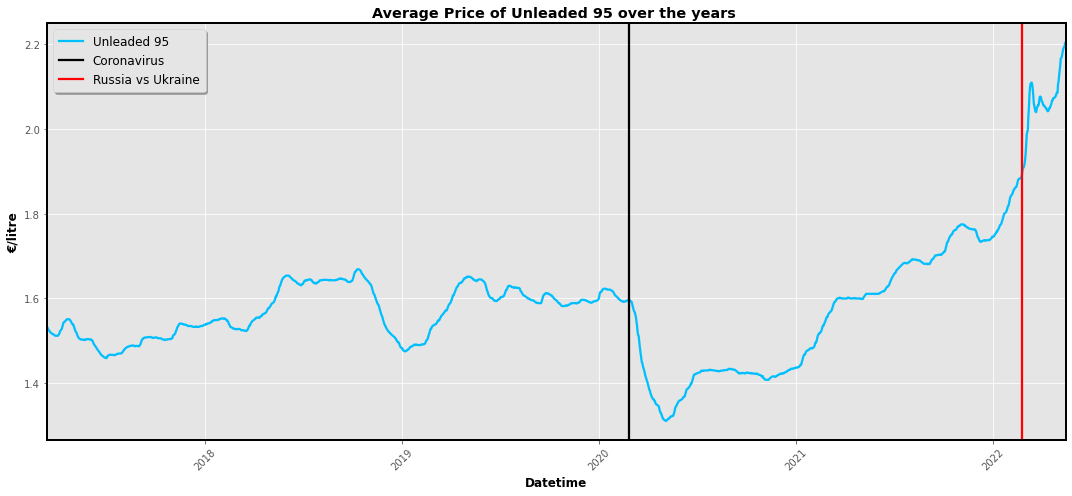

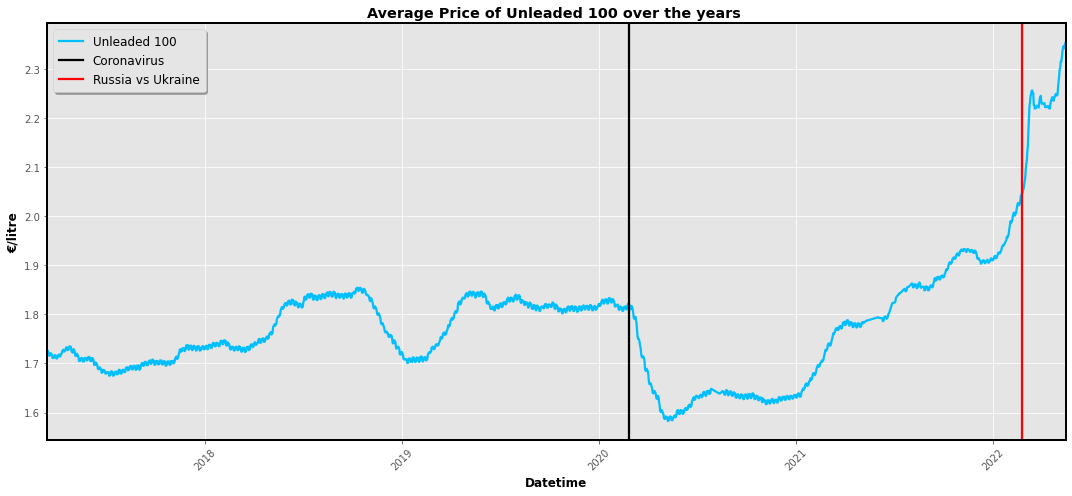

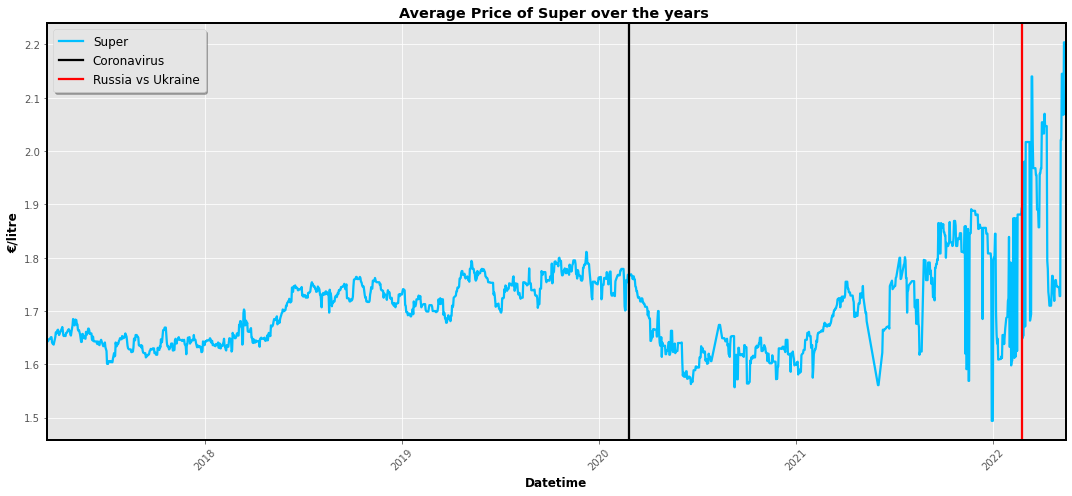

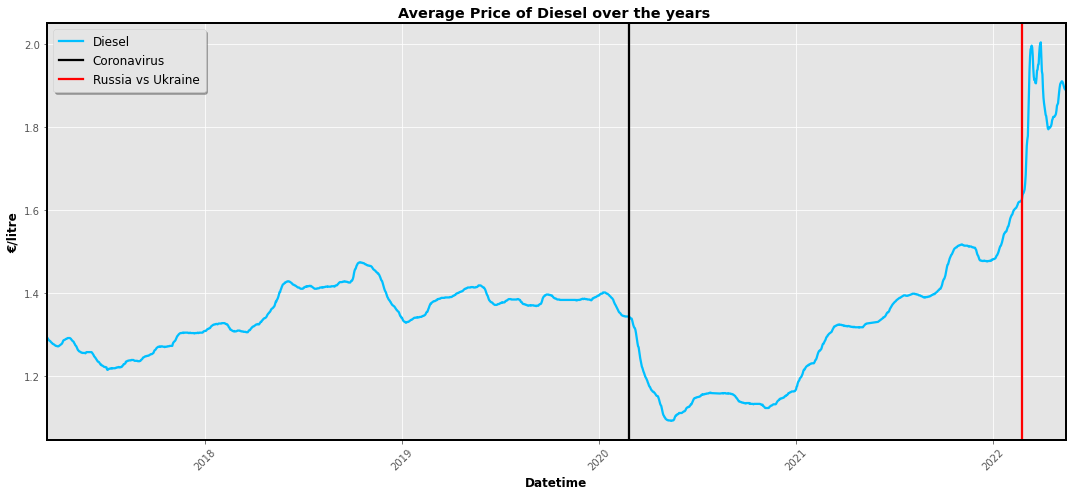

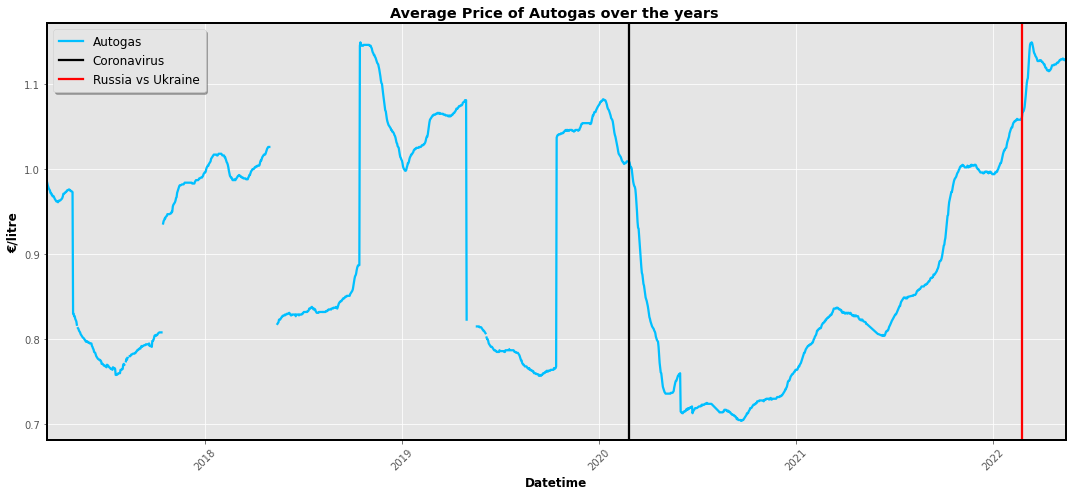

In [8]:
for fuel in all_data.columns:
    plt.style.use('ggplot')
    plt.figure(figsize=(15,7))
    
    
    plt.rc('axes',edgecolor='k',linewidth=2)
    plt.plot(all_data.xs('all', level='nomos')[fuel], label=fuel, c='deepskyblue', linewidth=2.25)

    plt.axvline(dt.datetime(2020, 2, 26), c='black', label="Coronavirus", linewidth=2.25)
    plt.axvline(dt.datetime(2022, 2, 24), c='red', label="Russia vs Ukraine", linewidth=2.25)

    plt.margins(x=0)
    plt.xticks(rotation = 45)

    plt.xlabel('Datetime',fontweight='bold',c='black')
    plt.ylabel('€/litre',fontweight='bold',c='black')
    plt.title(f"Average Price of {fuel} over the years ", fontweight='bold',c='black')
    plt.tight_layout()
    plt.legend(loc=2,frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=0.5, fontsize='large')
    plt.show()

---
### Most expensive - cheap prefectures for each type of Fuel

1) For the year 2021

In [9]:
range1=[[] for _ in range(len(all_data.columns))]
for j in range(len(all_data.columns)):
    for i in range(len(nomoi)):
        temp=mean(all_data.xs(nomoi[i], level='nomos')[all_data.columns[j]].loc['2021-01-01 00:00:00':'2022-01-01 00:00:00'])
        range1[j].append(temp)

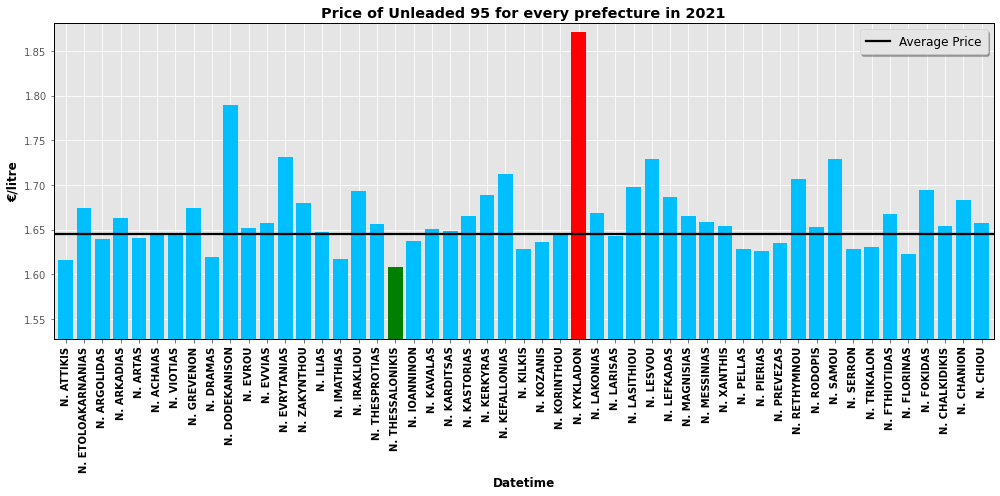

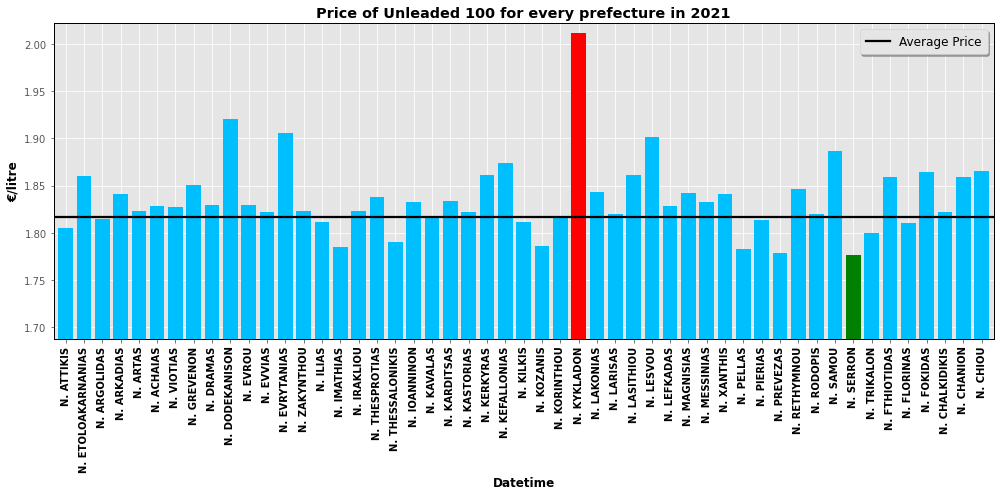

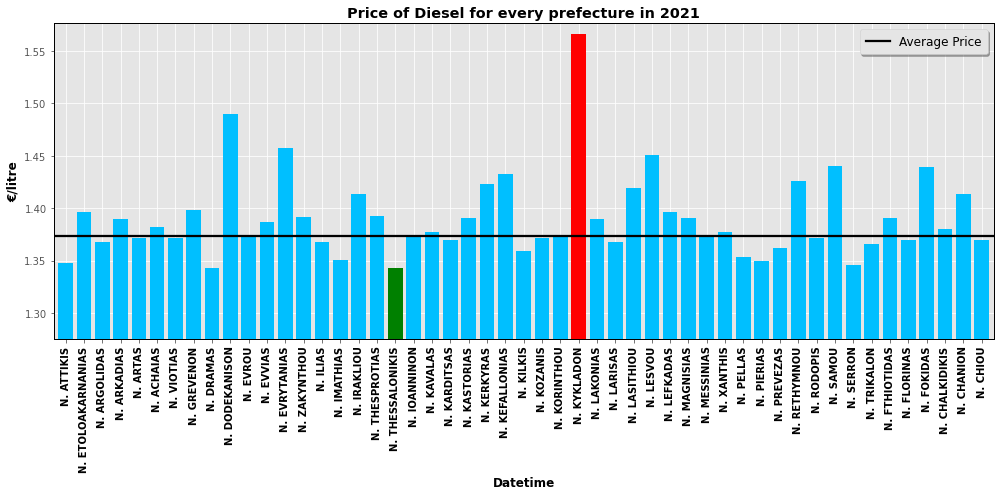

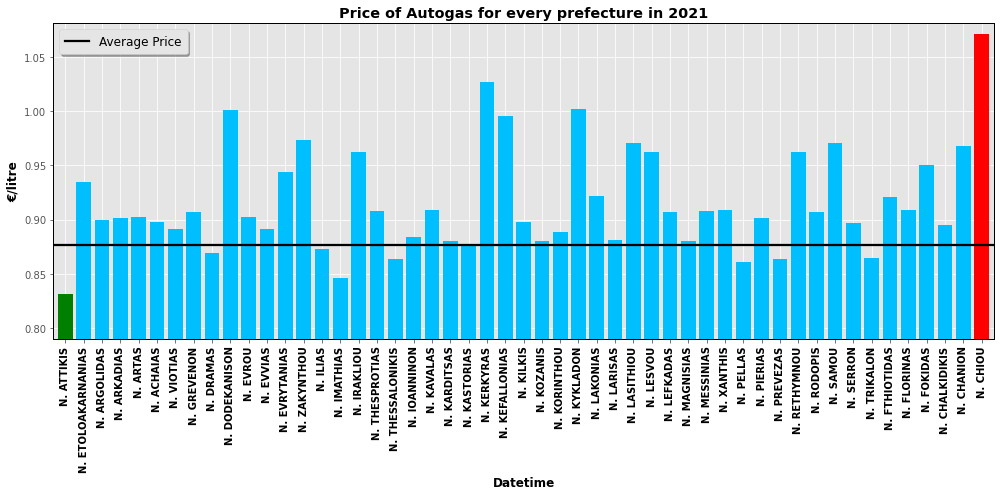

In [10]:
for i in range(len(range1)): 
    #Excluded Super because of the number of missing values for each prefecture 
    if i==2:
        continue

    plt.figure(figsize=(14,7))
    plt.style.use('ggplot')
    plt.rc('axes',edgecolor='k')

    clrs = ['red' if (x == max(range1[i])) else 'green' if x==min(range1[i]) else 'deepskyblue'  for x in range1[i] ]
    plt.ylim([min(range1[i])*0.95,max(range1[i])+0.01])
    plt.bar(nomoi[:-1],range1[i][:-1],color=clrs)

    plt.axhline(range1[i][-1],c='black',label="Average Price",linewidth=2.25)
    plt.xticks(nomoi[:-1],fontweight='bold',rotation = 90,c='black')
    plt.margins(x=0.005)

    plt.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=0.5, fontsize='large')
    plt.xlabel('Datetime',fontweight='bold',c='black')
    plt.ylabel('€/litre',fontweight='bold',c='black')
    plt.title(f"Price of {all_data.columns[i]} for every prefecture in 2021", fontweight='bold',c='black')
    plt.tight_layout()

    plt.show()

2) For the ongoing year 2022

In [11]:
range2=[[] for _ in range(len(all_data.columns))]
for j in range(len(all_data.columns)):
    for i in range(len(nomoi)):
        temp=mean(all_data.xs(nomoi[i], level='nomos')[all_data.columns[j]].loc['2022-01-01 00:00:00':])
        range2[j].append(temp)

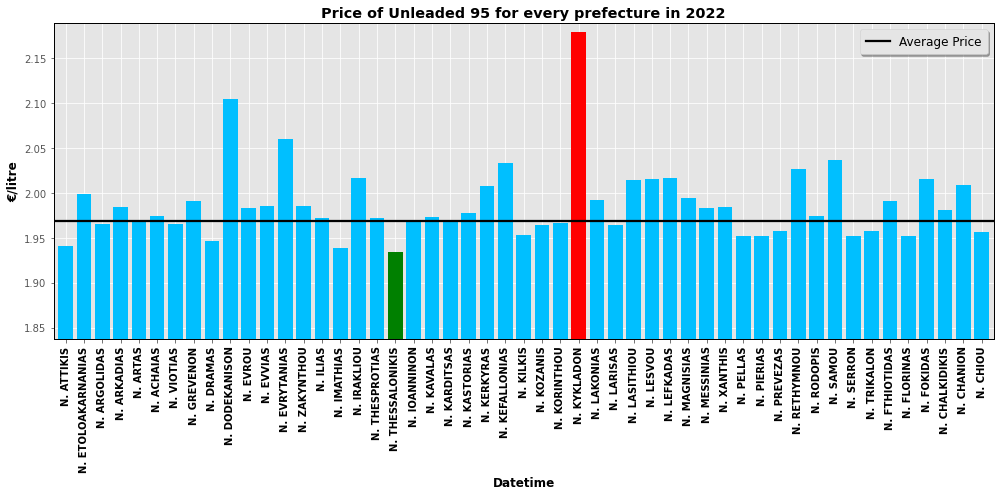

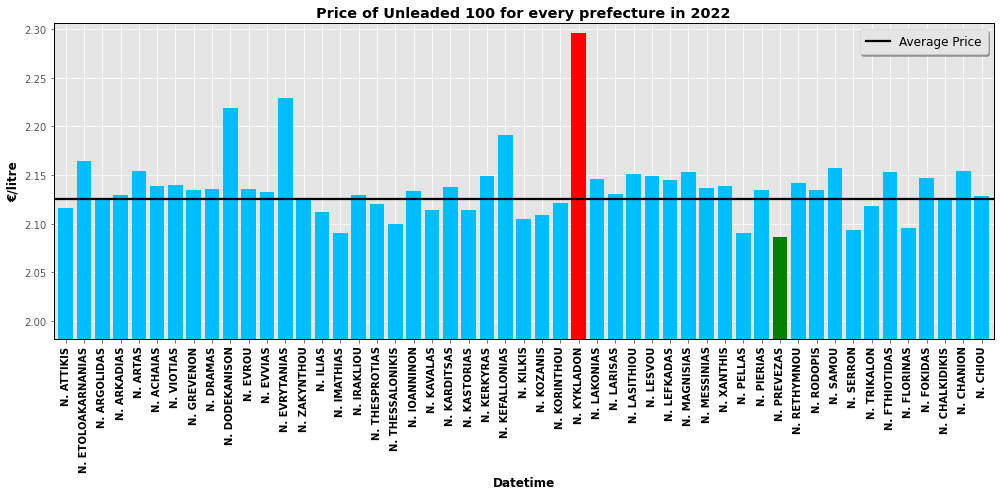

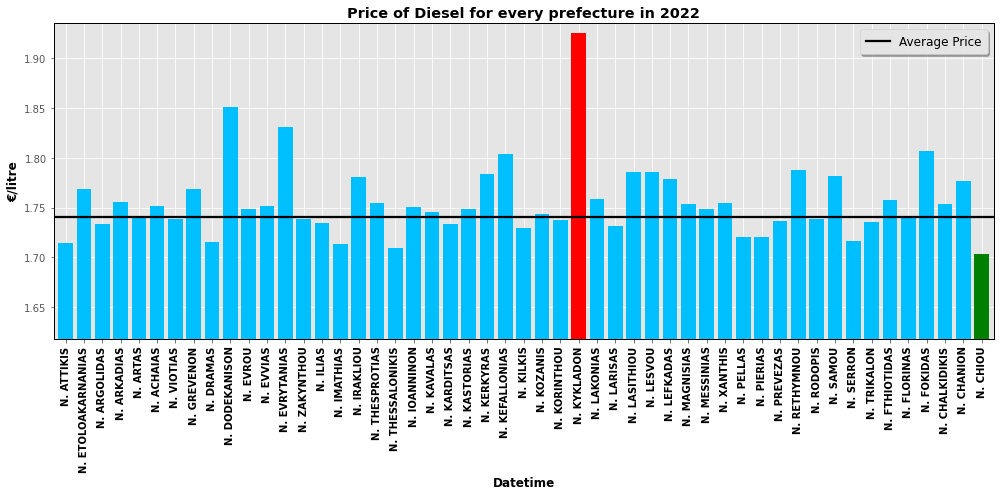

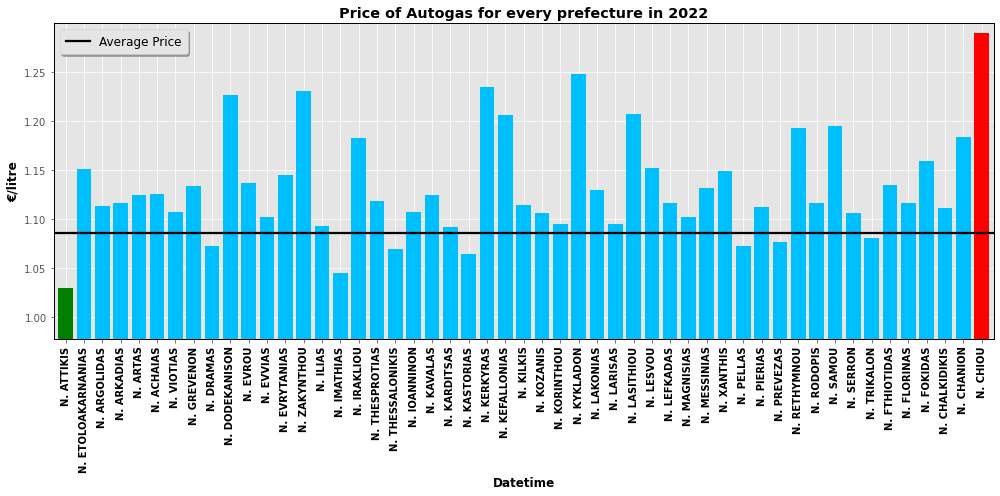

In [12]:
for i in range(len(range2)): 
    #Excluded Super because of the number of missing values for each prefecture 
    if i==2:
        continue
    
    plt.figure(figsize=(14,7))
    plt.style.use('ggplot')
    plt.rc('axes',edgecolor='k')

    clrs = ['red' if (x == max(range2[i])) else 'green' if x==min(range2[i]) else 'deepskyblue'  for x in range2[i] ]
    plt.bar(nomoi[:-1],range2[i][:-1], color=clrs)

    plt.axhline(range2[i][-1],c='black',label="Average Price",linewidth=2.25)


    plt.margins(x=0.005)
    plt.xticks(fontweight='bold',rotation = 90,c='black')
    plt.xlabel('Datetime',fontweight='bold',c='black')

    plt.ylim([min(range2[i])*0.95,max(range2[i])+0.01])
    plt.ylabel('€/litre',fontweight='bold',c='black')

    plt.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=0.5, fontsize='large')
    plt.title(f"Price of {all_data.columns[i]} for every prefecture in 2022", fontweight='bold',c='black')
    plt.tight_layout()

    plt.show()

3) Throughout the years

In [13]:
range3=[[] for _ in range(len(all_data.columns))]
for j in range(len(all_data.columns)):
    for i in range(len(nomoi)):
        temp=mean(all_data.xs(nomoi[i], level='nomos')[all_data.columns[j]])
        range3[j].append(temp)

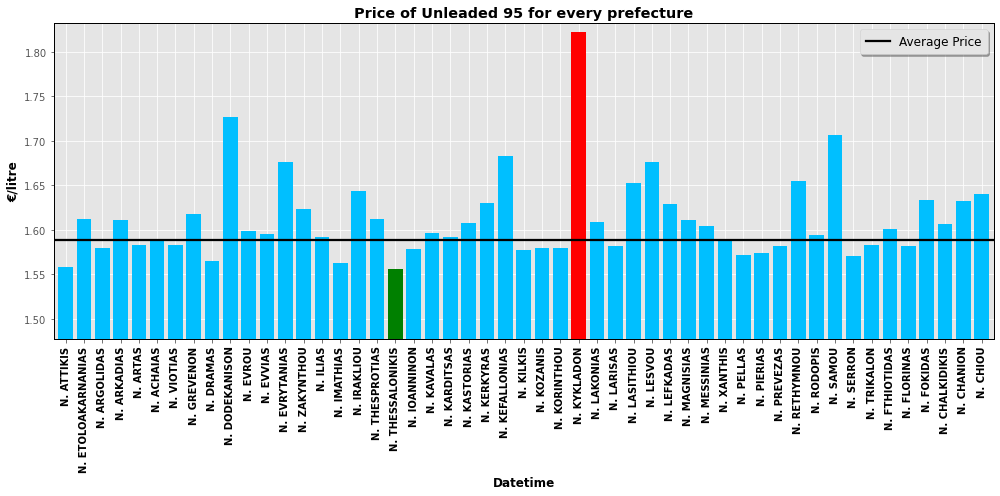

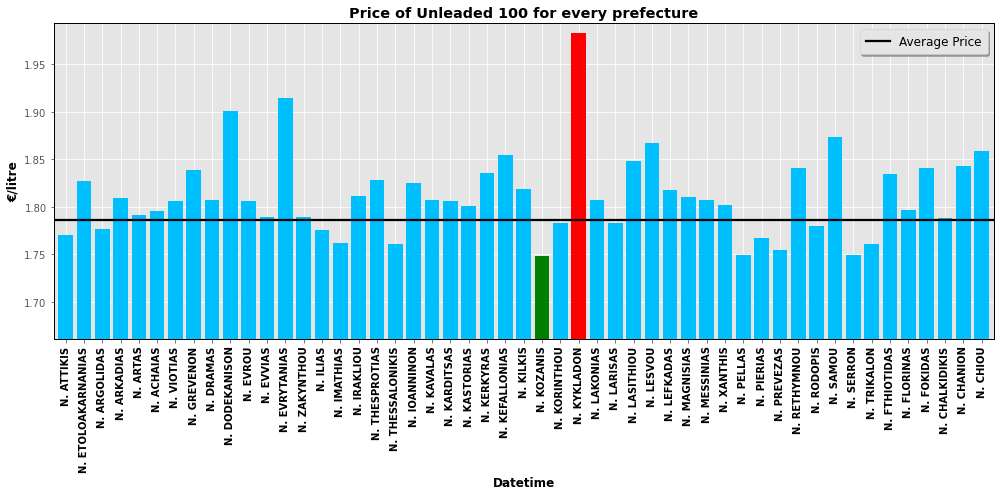

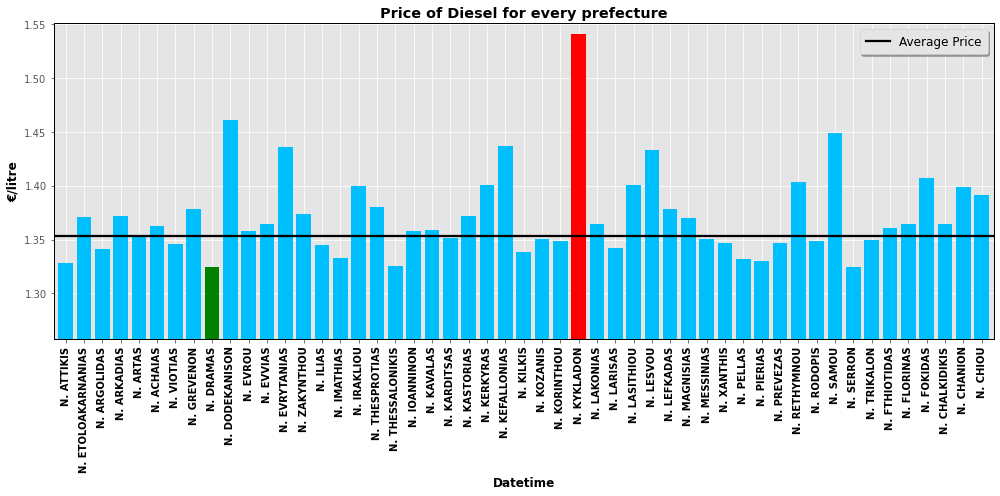

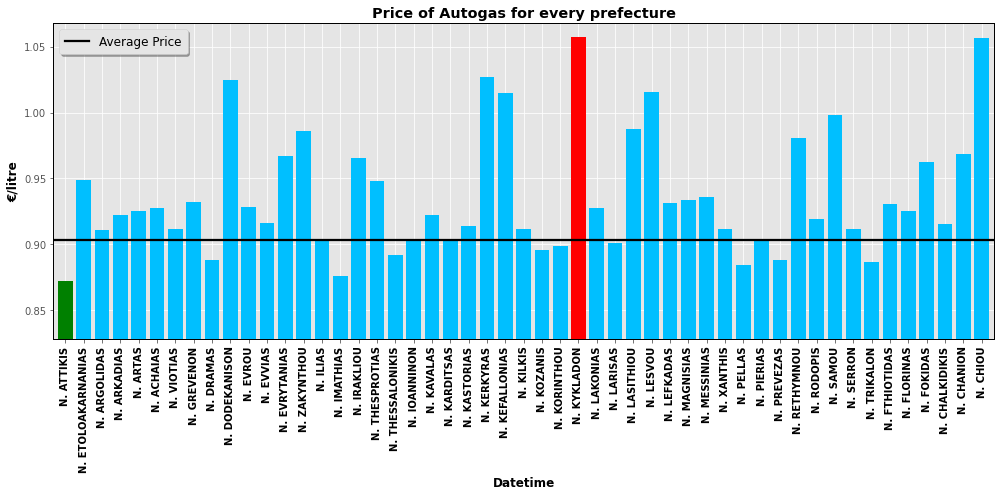

In [14]:
for i in range(len(range3)): 
    #Excluded Super because of the number of missing values for each prefecture 
    if i==2:
        continue

    plt.figure(figsize=(14,7))
    plt.style.use('ggplot')
    plt.rc('axes',edgecolor='k')

    clrs = ['red' if (x == max(range3[i])) else 'green' if x==min(range3[i]) else 'deepskyblue'  for x in range3[i] ]
    plt.ylim([min(range3[i])*0.95,max(range3[i])+0.01])
    plt.bar(nomoi[:-1],range3[i][:-1],color=clrs)

    plt.axhline(range3[i][-1],c='black',label="Average Price",linewidth=2.25)
    plt.xticks(nomoi[:-1],fontweight='bold',rotation = 90,c='black')
    plt.margins(x=0.005)

    plt.legend(frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=0.5, fontsize='large')
    plt.xlabel('Datetime',fontweight='bold',c='black')
    plt.ylabel('€/litre',fontweight='bold',c='black')
    plt.title(f"Price of {all_data.columns[i]} for every prefecture", fontweight='bold',c='black')
    plt.tight_layout()

    plt.show()